### Import Libraries

In [284]:
import pandas as pd    #pandas 
import numpy as np     # numpy
import glob
#visulaization library
import matplotlib.pyplot as plt
import seaborn as sns
#to display all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
#Spacy text processing 
import spacy
import en_core_web_sm
import nltk
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import gensim
from textblob import TextBlob

import re 

### Data loading

In [285]:
# path = r'C:\Users\user\Desktop\FiverProject\Project1' # use your path
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)
frame=pd.read_csv('data.csv')
frame.head()

,TweetID,TweetDate,TweetText,retweetCount,FavouriteCount,IsFavourite,ISretweetd,userDate,screen_name,status_count,follower_count,freind_count,userFavouriteCount
0,1388361699825160198,2021-05-01 05:16:38,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2011-01-26 08:29:27,elvia_francis,30064,783,3244,39802
1,1388205043422310402,2021-04-30 18:54:08,RT @rachellsarnoff: New initiative to draw carbon from air pollution and turn it into ink and dy...,1,0,False,False,2021-01-11 16:56:45,SustainTrends,172107,3538,158,25789
2,1388205019284090880,2021-04-30 18:54:02,New initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...,1,0,False,False,2008-07-18 00:17:09,rachellsarnoff,13895,7604,6773,2890
3,1388019900103471108,2021-04-30 06:38:27,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2009-10-12 13:04:46,faridatir,2583,160,132,1204
4,1387732819175161856,2021-04-29 11:37:41,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2010-05-06 23:33:58,imagine_garden,244710,5028,995,4102


In [286]:
frame.drop_duplicates(subset ='TweetID',
                     keep = 'first',inplace = True)
frame.reset_index(drop=True,inplace=True)
#frame.drop_duplicates(keep=False,inplace=True)

In [287]:
print(frame.shape)
frame['TweetID'].nunique()

(372, 13)


372

Use your processed data file to produce a series of graphs or charts to summarise the following information. I. The number of tweets posted per day II. The number of unique users per day III. The top 10 most active users over the entire period In your report you MUST detail your processing steps and comment on the results. 



In [288]:
frame['TweetDate']=pd.to_datetime(frame['TweetDate']).dt.date
frame['TweetDate']=pd.to_datetime(frame['TweetDate'], errors='coerce')
#frame['TweetDate']
frame['Day']=frame['TweetDate'].dt.day
frame['Months']=frame['TweetDate'].dt.month
frame['Year']=frame['TweetDate'].dt.year
frame.head()

,TweetID,TweetDate,TweetText,retweetCount,FavouriteCount,IsFavourite,ISretweetd,userDate,screen_name,status_count,follower_count,freind_count,userFavouriteCount,Day,Months,Year
0,1388361699825160198,2021-05-01,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2011-01-26 08:29:27,elvia_francis,30064,783,3244,39802,1,5,2021
1,1388205043422310402,2021-04-30,RT @rachellsarnoff: New initiative to draw carbon from air pollution and turn it into ink and dy...,1,0,False,False,2021-01-11 16:56:45,SustainTrends,172107,3538,158,25789,30,4,2021
2,1388205019284090880,2021-04-30,New initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...,1,0,False,False,2008-07-18 00:17:09,rachellsarnoff,13895,7604,6773,2890,30,4,2021
3,1388019900103471108,2021-04-30,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2009-10-12 13:04:46,faridatir,2583,160,132,1204,30,4,2021
4,1387732819175161856,2021-04-29,RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...,3,0,False,False,2010-05-06 23:33:58,imagine_garden,244710,5028,995,4102,29,4,2021


### **Unique Tweet For Each Day**

In [289]:
tweetDf=pd.DataFrame(frame.groupby(['TweetDate'])['TweetID'].nunique())
tweetDf

,TweetID
TweetDate,
2021-04-20,31
2021-04-21,36
2021-04-22,66
2021-04-23,19
2021-04-24,6
2021-04-25,7
2021-04-26,53
2021-04-27,32
2021-04-28,14


([<matplotlib.axis.XTick at 0x7f87c1bc7150>,
 [Text(0, 0, '2021-04-20 00:00:00'),
  Text(0, 0, '2021-04-21 00:00:00'),
  Text(0, 0, '2021-04-22 00:00:00'),
  Text(0, 0, '2021-04-23 00:00:00'),
  Text(0, 0, '2021-04-24 00:00:00'),
  Text(0, 0, '2021-04-25 00:00:00'),
  Text(0, 0, '2021-04-26 00:00:00'),
  Text(0, 0, '2021-04-27 00:00:00'),
  Text(0, 0, '2021-04-28 00:00:00'),
  Text(0, 0, '2021-04-29 00:00:00'),
  Text(0, 0, '2021-04-30 00:00:00'),
  Text(0, 0, '2021-05-01 00:00:00'),
  Text(0, 0, '2021-05-02 00:00:00'),
  Text(0, 0, '2021-05-03 00:00:00'),
  Text(0, 0, '2021-05-04 00:00:00'),
  Text(0, 0, '2021-05-05 00:00:00')])

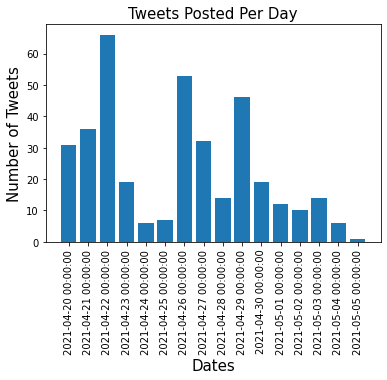

In [290]:
plt.bar(tweetDf.index,tweetDf.TweetID)
plt.title('Tweets Posted Per Day',fontsize = 15)
plt.xlabel('Dates', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.xticks(tweetDf.index, tweetDf.index, rotation ='vertical')

##**Unique User per Day**

In [291]:
tweetDf=pd.DataFrame(frame.groupby(['TweetDate'])['screen_name'].nunique())
tweetDf

,screen_name
TweetDate,
2021-04-20,30
2021-04-21,32
2021-04-22,51
2021-04-23,17
2021-04-24,6
2021-04-25,7
2021-04-26,48
2021-04-27,31
2021-04-28,12


([<matplotlib.axis.XTick at 0x7f87c37eead0>,
 [Text(0, 0, '2021-04-20 00:00:00'),
  Text(0, 0, '2021-04-21 00:00:00'),
  Text(0, 0, '2021-04-22 00:00:00'),
  Text(0, 0, '2021-04-23 00:00:00'),
  Text(0, 0, '2021-04-24 00:00:00'),
  Text(0, 0, '2021-04-25 00:00:00'),
  Text(0, 0, '2021-04-26 00:00:00'),
  Text(0, 0, '2021-04-27 00:00:00'),
  Text(0, 0, '2021-04-28 00:00:00'),
  Text(0, 0, '2021-04-29 00:00:00'),
  Text(0, 0, '2021-04-30 00:00:00'),
  Text(0, 0, '2021-05-01 00:00:00'),
  Text(0, 0, '2021-05-02 00:00:00'),
  Text(0, 0, '2021-05-03 00:00:00'),
  Text(0, 0, '2021-05-04 00:00:00'),
  Text(0, 0, '2021-05-05 00:00:00')])

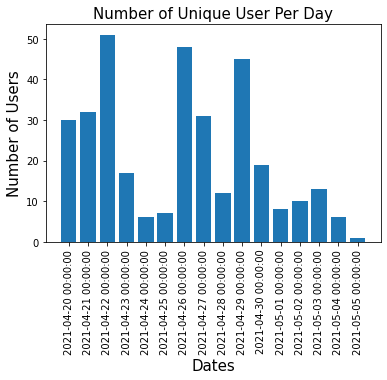

In [292]:
plt.bar(tweetDf.index,tweetDf.screen_name)
plt.title('Number of Unique User Per Day',fontsize = 15)
plt.xlabel('Dates', fontsize = 15)
plt.ylabel('Number of Users', fontsize = 15)
plt.xticks(tweetDf.index, tweetDf.index, rotation ='vertical')

## **10 Most Active User**

In [293]:
tweetDf=pd.DataFrame(frame.groupby(['screen_name'])['TweetID'].nunique())
tweetDf.sort_values(by=['TweetID'],ascending=False,inplace=True)
tDf=tweetDf.head(10)
tDf

,TweetID
screen_name,
thepangaia,28
FluidInterfaces,6
Selfridges,4
elvia_francis,4
touchaddict,3
marciasgreen,3
medialab,3
designscene,3
defcon_5,3


([<matplotlib.axis.XTick at 0x7f87c51e6810>,
 [Text(0, 0, 'thepangaia'),
  Text(0, 0, 'FluidInterfaces'),
  Text(0, 0, 'Selfridges'),
  Text(0, 0, 'elvia_francis'),
  Text(0, 0, 'touchaddict'),
  Text(0, 0, 'marciasgreen'),
  Text(0, 0, 'medialab'),
  Text(0, 0, 'designscene'),
  Text(0, 0, 'defcon_5'),
  Text(0, 0, 'techonomy')])

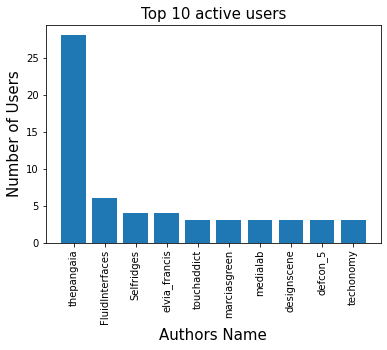

In [294]:
plt.bar(tDf.index,tDf.TweetID)
plt.title('Top 10 active users',fontsize = 15)
plt.xlabel('Authors Name', fontsize = 15)
plt.ylabel('Number of Users', fontsize = 15)
plt.xticks(tDf.index, tDf.index, rotation ='vertical')

In [295]:
frame['TweetText']

0      RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...
1      RT @rachellsarnoff: New initiative to draw carbon from air pollution and turn it into ink and dy...
2      New initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
3      RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...
4      RT @PromostylParis: Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its ne...
5      Eco-friendly essential ♻️\nThe eco-friendly brand @thepangaia unveils its new capsule collection...
6      re-selling blue pangaia tracksuit in size XS  pls dm for more details #pangaia #kuwait #resell #...
7                                            Check out the latest #PANGAIA looks modeled by #NaomiCampbell
8      RT @voguemagazine: .@thePangaia’s new Air-Ink capsule and the hoodies, t-shirts, and track pants...
9      “Family can be biological, but

In [296]:
frame['TweetDate'].unique()

array(['2021-05-01T00:00:00.000000000', '2021-04-30T00:00:00.000000000',
       '2021-04-29T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-04-27T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-25T00:00:00.000000000', '2021-04-24T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-05-02T00:00:00.000000000',
       '2021-05-03T00:00:00.000000000', '2021-05-04T00:00:00.000000000',
       '2021-05-05T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-21T00:00:00.000000000', '2021-04-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [297]:
frame['screen_name'].nunique()

303

### Analyzing text statistics

word frequency analysis,

sentence length analysis,

average word length analysis,

Text(0.5, 1.0, 'Length of Tweets')

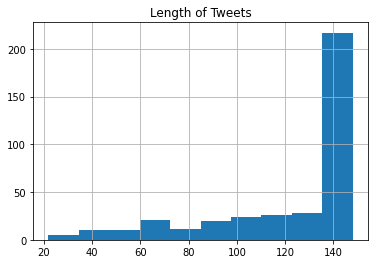

In [298]:
frame['TweetText'].str.len().hist()
plt.title('Length of Tweets')

The histogram shows that Tweets range from 21 to 145 characters

Text(0.5, 1.0, 'count of words in Tweet')

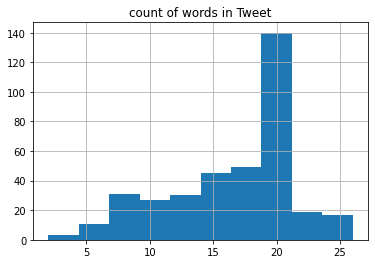

In [299]:
text=frame['TweetText']
text.str.split().map(lambda x: len(x)).hist()
plt.title('count of words in Tweet')

it is clear that the number of words in Tweet ranges from 5 to 25 and mostly falls between 15 to 21 words.

Text(0.5, 1.0, 'Average word length')

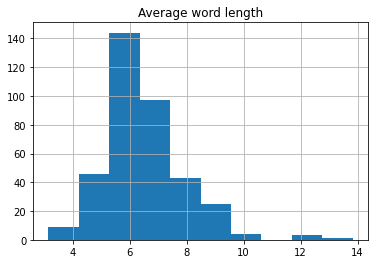

In [300]:
text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Average word length')

The average word length ranges between 3 to 10 with 6 being the most common length

In [301]:
nltk.download('stopwords')
  
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Stop Word Corpus')

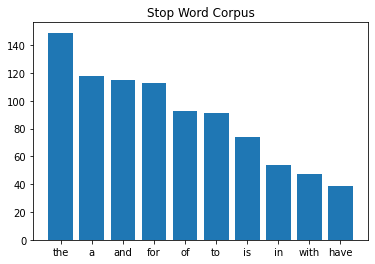

In [302]:
corpus=[]
new= frame['TweetText'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Stop Word Corpus')

We can evidently see that stopwords such as 'the','and' and 'for' dominate in Tweets.

##### So now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently.

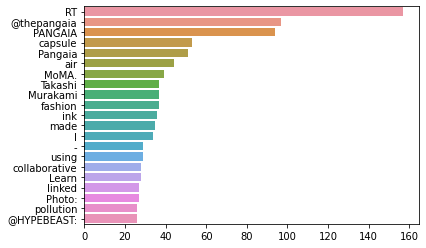

In [303]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Ngram exploration

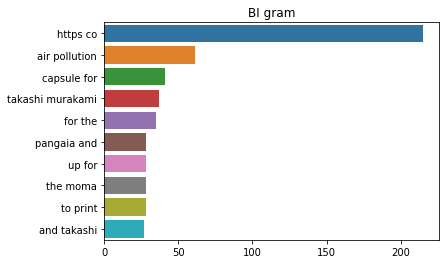

In [304]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(frame['TweetText'],2)
x,y=map(list,zip(*top_n_bigrams))
plt.title('BI gram')
sns.barplot(x=y,y=x)

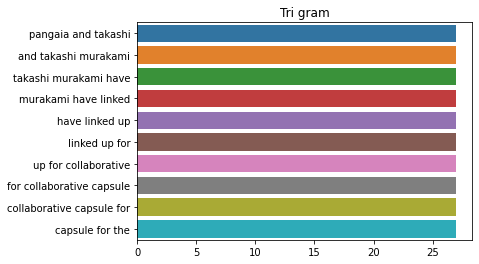

In [305]:
top_tri_grams=get_top_ngram(frame['TweetText'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.title('Tri gram')
sns.barplot(x=y,y=x)

### Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

### NLP Preprocessing and data cleaning

#### tokenize: the process by which sentences are converted to a list of tokens or words.



#### remove stopwords

#### lemmatize: reduces the inflectional forms of each word into a common base or root.



#### convert to the bag of words: 

Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the 

number of times each word occurs in the corpus.

In [306]:
# removing everything except alphabets`
### Removing un wanted links hastgas ect
lst=[]
for i in  (frame['TweetText']):
   text=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",i).split())
   lst.append(text)
frame['TweetText']=lst




###Cleaning RT 
z = lambda x:re.compile('RT').sub('', x).strip()
lst=[]
for i in frame['TweetText']:
  lst.append(z(i))
frame['TweetText']=lst  


#lower case 
frame['TweetText']=frame['TweetText'].str.lower()

In [307]:
lst

['Eco friendly essential The eco friendly brand unveils its new capsule collection composed of hoodies t',
 'New initiative to draw carbon from air pollution and turn it into ink and dyes comes to life with PANGAIA',
 'New initiative to draw carbon from air pollution and turn it into ink and dyes comes to life with PANGAIA',
 'Eco friendly essential The eco friendly brand unveils its new capsule collection composed of hoodies t',
 'Eco friendly essential The eco friendly brand unveils its new capsule collection composed of hoodies t',
 'Eco friendly essential The eco friendly brand unveils its new capsule collection composed of hoodies',
 're selling blue pangaia tracksuit in size XS pls dm for more details pangaia kuwait resell forsale sale sweatpants',
 'Check out the latest PANGAIA looks modeled by NaomiCampbell',
 's new Air Ink capsule and the hoodies t shirts and track pants in it bear an innovative description THE',
 'Family can be biological but it s also about adopting and fin

In [308]:
frame['TweetText']

0      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
1      new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
2      new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
3      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
4      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
5      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
6      re selling blue pangaia tracksuit in size xs pls dm for more details pangaia kuwait resell forsa...
7                                              check out the latest pangaia looks modeled by naomicampbell
8      s new air ink capsule and the hoodies t shirts and track pants in it bear an innovative descript...
9      family can be biological but i

In [309]:
#Downloading NLTK Packagaes
nltk.download('punkt')
nltk.download('wordnet')
#loading Word Net lemmatizer
from nltk.stem import WordNetLemmatizer
def preprocess_news(df):
    """
    Function to take dataframe of tweets and apply three steps
    1) Stemming
    2) Lemmatizing
    3) Tokenization
    """
    corpus=[]
    stem=PorterStemmer()  #stemming 
    lem=WordNetLemmatizer() #lemmatizing 
    for tweet in frame['TweetText']:
        words=[w for w in nltk.tokenize.word_tokenize(tweet) if (w not in stop_words)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(frame)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [310]:
corpus

[['eco',
  'friendly',
  'essential',
  'eco',
  'friendly',
  'brand',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies'],
 ['new',
  'initiative',
  'draw',
  'carbon',
  'air',
  'pollution',
  'turn',
  'ink',
  'dye',
  'come',
  'life',
  'pangaia'],
 ['new',
  'initiative',
  'draw',
  'carbon',
  'air',
  'pollution',
  'turn',
  'ink',
  'dye',
  'come',
  'life',
  'pangaia'],
 ['eco',
  'friendly',
  'essential',
  'eco',
  'friendly',
  'brand',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies'],
 ['eco',
  'friendly',
  'essential',
  'eco',
  'friendly',
  'brand',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies'],
 ['eco',
  'friendly',
  'essential',
  'eco',
  'friendly',
  'brand',
  'unveils',
  'new',
  'capsule',
  'collection',
  'composed',
  'hoodies'],
 ['selling',
  'blue',
  'pangaia',
  'tracksuit',
  'size',
  'pls',
  'detail',
  'pangaia',
  'kuwait',
  'resell',
  'forsale'

#### Bag of Word Model 

In [311]:
#Bag of words Model
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(8, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(8, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(18, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(18, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(1, 1),
  (7, 1),
  (8, 1),
  (10, 1),
  (16, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(17, 1),
  (43, 1),
 

In [312]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.030*"capsule" + 0.025*"edition" + 0.025*"limited" + 0.022*"alum" + 0.022*"founded" + 0.022*"drop" + 0.020*"moma" + 0.013*"spinoff" + 0.013*"spotted" + 0.012*"collaboration"'),
 (1,
  '0.053*"air" + 0.050*"ink" + 0.049*"pollution" + 0.046*"pangaia" + 0.027*"made" + 0.022*"fashion" + 0.020*"print" + 0.020*"using" + 0.018*"label" + 0.016*"first"'),
 (2,
  '0.030*"pangaia" + 0.020*"look" + 0.015*"problem" + 0.014*"little" + 0.014*"fashion" + 0.013*"discover" + 0.013*"differently" + 0.013*"might" + 0.013*"untapped" + 0.013*"huge"'),
 (3,
  '0.093*"pangaia" + 0.038*"murakami" + 0.036*"takashi" + 0.035*"moma" + 0.031*"capsule" + 0.028*"learn" + 0.028*"photo" + 0.028*"collaborative" + 0.027*"linked" + 0.010*"one"')]

In [313]:
pip install pyLDAvis

In [314]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()  
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.230266  0.000825       1        1  41.032350
3     -0.071836 -0.117113       2        1  25.374582
2     -0.081651 -0.066802       3        1  19.101699
0     -0.076778  0.183090       4        1  14.491369, topic_info=                Term        Freq       Total Category  logprob  loglift
10               air   71.000000   71.000000  Default  30.0000  30.0000
16               ink   67.000000   67.000000  Default  29.0000  29.0000
18           pangaia  153.000000  153.000000  Default  28.0000  28.0000
19         pollution   66.000000   66.000000  Default  27.0000  27.0000
175         murakami   31.000000   31.000000  Default  26.0000  26.0000
177          takashi   29.000000   29.000000  Default  25.0000  25.0000
79              moma   37.000000   37.000000  Default  24.0000  24.0000
1            capsule   44.000000   44.000000  Default  23.0000  23.0000
210            learn   23.000000   23.000000  Default  22.0000  22.0000
209    collaborative   22.000000   22.000000  Default  21.0000  21.0000
211           linked   22.000000   22.000000  Default  20.0000  20.0000
83              made   36.000000   36.000000  Default  19.0000  19.0000
63             photo   25.000000   25.000000  Default  18.0000  18.0000
77           edition   12.000000   12.000000  Default  17.0000  17.0000
78           limited   12.000000   12.000000  Default  16.0000  16.0000
408             alum   10.000000   10.000000  Default  15.0000  15.0000
409          founded   10.000000   10.000000  Default  14.0000  14.0000
76              drop   10.000000   10.000000  Default  13.0000  13.0000
262            print   26.000000   26.000000  Default  12.0000  12.0000
143            using   26.000000   26.000000  Default  11.0000  11.0000
34              look   13.000000   13.000000  Default  10.0000  10.0000
261            label   23.000000   23.000000  Default   9.0000   9.0000
141            first   21.000000   21.000000  Default   8.0000   8.0000
324          problem    9.000000    9.000000  Default   7.0000   7.0000
260          graphic   20.000000   20.000000  Default   6.0000   6.0000
321           little    9.000000    9.000000  Default   5.0000   5.0000
263            toxic   19.000000   19.000000  Default   4.0000   4.0000
182          fashion   38.000000   38.000000  Default   3.0000   3.0000
319      differently    8.000000    8.000000  Default   2.0000   2.0000
322            might    8.000000    8.000000  Default   1.0000   1.0000
83              made   35.508287   36.101830   Topic1  -3.6069   0.8742
262            print   26.276843   26.851394   Topic1  -3.9080   0.8692
16               ink   65.644802   67.146612   Topic1  -2.9924   0.8682
143            using   26.237034   26.846786   Topic1  -3.9095   0.8678
261            label   22.906631   23.486678   Topic1  -4.0452   0.8658
260          graphic   20.389118   20.963783   Topic1  -4.1617   0.8630
141            first   21.183705   21.801898   Topic1  -4.1234   0.8620
10               air   69.207001   71.318680   Topic1  -2.9396   0.8608
263            toxic   18.706985   19.281632   Topic1  -4.2478   0.8606
19         pollution   63.497497   66.236301   Topic1  -3.0257   0.8486
4                eco   10.288724   10.869399   Topic1  -4.8456   0.8359
68             based    9.457062   10.030057   Topic1  -4.9299   0.8320
6           friendly    8.618120    9.188884   Topic1  -5.0228   0.8267
378         circular    8.564934    9.184180   Topic1  -5.0290   0.8210
687          kicking    6.938565    7.507092   Topic1  -5.2396   0.8121
686     highlighting    6.938446    7.507079   Topic1  -5.2396   0.8120
688            stand    6.938440    7.507080   Topic1  -5.2396   0.8120
13              draw    6.938415    7.507085   Topic1  -5.2396   0.8120
69             black    6.938082    7.507069   Topic1  -5.2396   0.8120
381           portal    6.930584 

On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles.

The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 4 overlap, this 

indicates that the topics are more similar.

On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are police, new, may, war, etc

In [315]:
frame['TweetText']

0      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
1      new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
2      new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
3      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
4      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
5      eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
6      re selling blue pangaia tracksuit in size xs pls dm for more details pangaia kuwait resell forsa...
7                                              check out the latest pangaia looks modeled by naomicampbell
8      s new air ink capsule and the hoodies t shirts and track pants in it bear an innovative descript...
9      family can be biological but i

## **What is the Dominant topic and its percentage contribution in each document**

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant

In [316]:
def format_topics_sentences(ldamodel,corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
# Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=frame['TweetText'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9398,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
1,1,1.0,0.9418,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
2,2,1.0,0.9418,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",new initiative to draw carbon from air pollution and turn it into ink and dyes comes to life wit...
3,3,1.0,0.9398,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
4,4,1.0,0.9398,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
5,5,1.0,0.9398,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",eco friendly essential the eco friendly brand unveils its new capsule collection composed of hoo...
6,6,3.0,0.9459,"pangaia, murakami, takashi, moma, capsule, learn, photo, collaborative, linked, one",re selling blue pangaia tracksuit in size xs pls dm for more details pangaia kuwait resell forsa...
7,7,1.0,0.5889,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",check out the latest pangaia looks modeled by naomicampbell
8,8,0.0,0.6813,"capsule, edition, limited, alum, founded, drop, moma, spinoff, spotted, collaboration",s new air ink capsule and the hoodies t shirts and track pants in it bear an innovative descript...
9,9,0.0,0.9307,"capsule, edition, limited, alum, founded, drop, moma, spinoff, spotted, collaboration",family can be biological but it s also about adopting and finding your people in life elijah mck...


## **The most representative sentence for each topic**

In [317]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9464,"capsule, edition, limited, alum, founded, drop, moma, spinoff, spotted, collaboration",ladygaga was spotted leaving her rome hotel while sporting the alc winona rib knit top 365 organ...
1,1.0,0.9519,"air, ink, pollution, pangaia, made, fashion, print, using, label, first",at pangaia we re revolutionizing how we use ink one product at a time air ink turns pollution in...
2,2.0,0.9488,"pangaia, look, problem, little, fashion, discover, differently, might, untapped, huge",137 check out these fashion brands focused on sustainable alternatives pangaia yes friends sep j...
3,3.0,0.9471,"pangaia, murakami, takashi, moma, capsule, learn, photo, collaborative, linked, one",global sustainable fashion market growth 2020 vuori adidas ag able pangaia patagonia inc outerkn...


## **Frequency Distribution of Word Counts in Documents**

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution

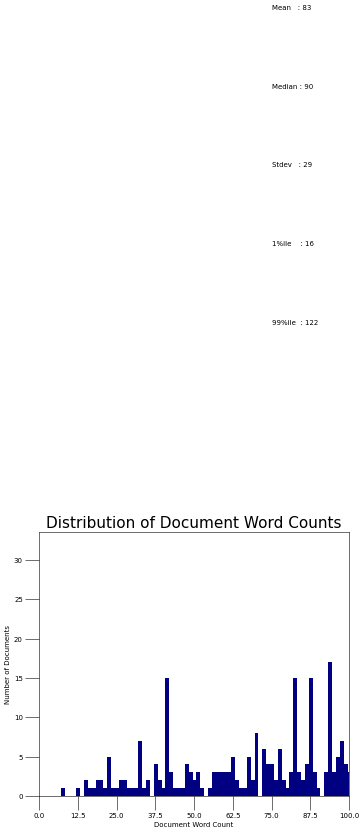

In [318]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(8,7), dpi=50)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(75, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(75,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(75,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(75,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(75,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=20)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

Text(0.5, 0.98, 'Distribution of Document Word Counts by Dominant Topic')

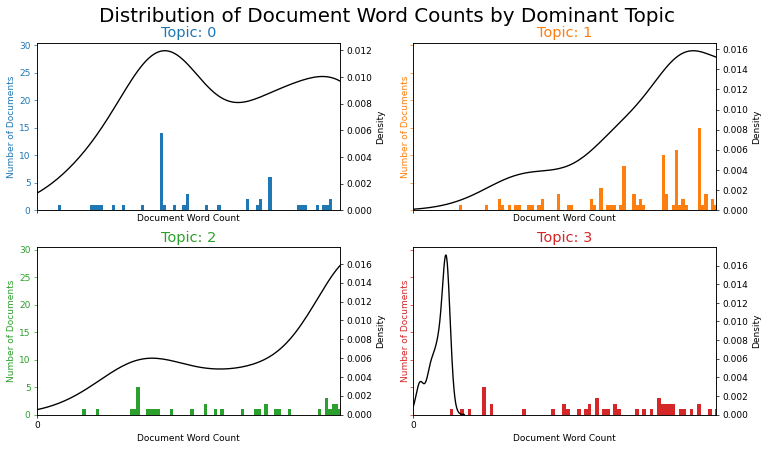

In [319]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(12,7), dpi=65, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)

## **Word Clouds of Top N Keywords in Each Topic**

Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

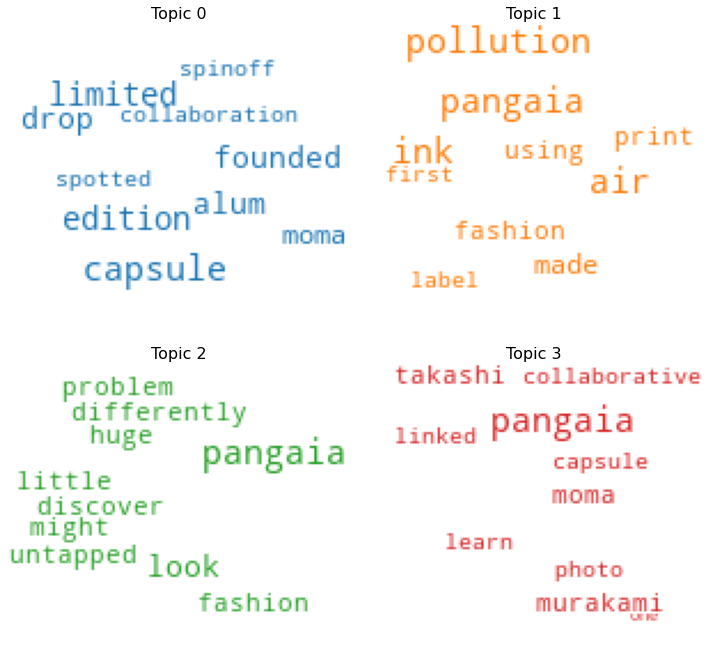

In [320]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=150,
                  height=120,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=15)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## **Word Counts of Topic Keywords**

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

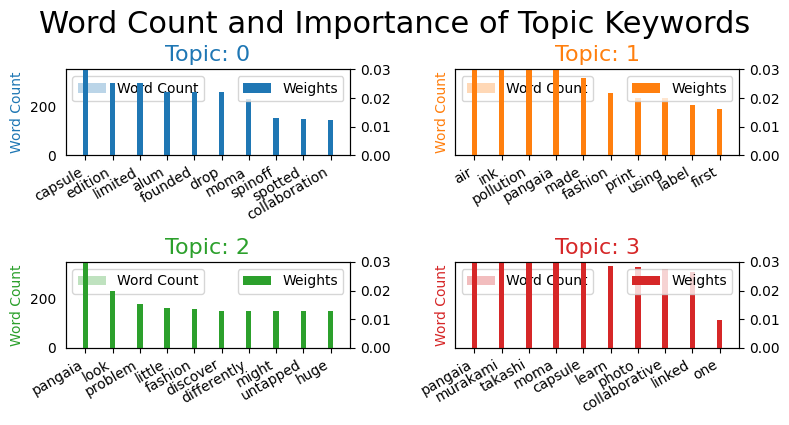

In [321]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in frame['TweetText'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,4), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 350)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## **What are the most discussed topics in the documents?**

Let’s compute the total number of documents attributed to each topic.

In [322]:
# # Sentence Coloring of N Sentences
# def topics_per_document(model, bow_corpus, start=0, end=1):
#     corpus_sel = bow_corpus[start:end]
#     dominant_topics = []
#     topic_percentages = []
#     for i, corp in enumerate(corpus_sel):
        
#         topic_percs, wordid_topics, wordid_phivalues,val = model[corp]
#         dominant_topic = topic_percs[0]
#         dominant_topic=sorted(topic_percs, key = lambda x:x[1], reverse=True)[0][0]
#         dominant_topics.append((i, dominant_topic))
#         topic_percentages.append(topic_percs)
#     return(dominant_topics, topic_percentages)

# dominant_topics, topic_percentages = topics_per_document(lda_model, bow_corpus, end=-1)            

# # Distribution of Dominant Topics in Each Document
# df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
# dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
# df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# #print(topic_percentages)
# # Total Topic Distribution by actual weight
# lst=[]
# def Convert(tup, di):
#     for a, b in tup:
#         di.setdefault(a, []).append(b)
#     return di
      
# for t in topic_percentages:
#   lst.append(t)
# dict1={}
# dict1=Convert(lst, dict1)
# topic_weightage_by_doc = pd.DataFrame(dict1)
# df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# # Top 3 Keywords for each Topic
# topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
#                                  for j, (topic, wt) in enumerate(topics) if j < 3]

# df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
# df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
# df_top3words.reset_index(level=0,inplace=True)



Let’s make two plots:

The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

In [323]:
# from matplotlib.ticker import FuncFormatter

# # Plot
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# # Topic Distribution by Dominant Topics
# ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
# ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
# tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
# ax1.xaxis.set_major_formatter(tick_formatter)
# ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
# ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

# plt.show()

## **t-SNE Clustering Chart**

Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 372 samples in 0.000s...
[t-SNE] Computed neighbors for 372 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 372 / 372
[t-SNE] Mean sigma: 0.000317
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.369041
[t-SNE] KL divergence after 1000 iterations: 0.052758


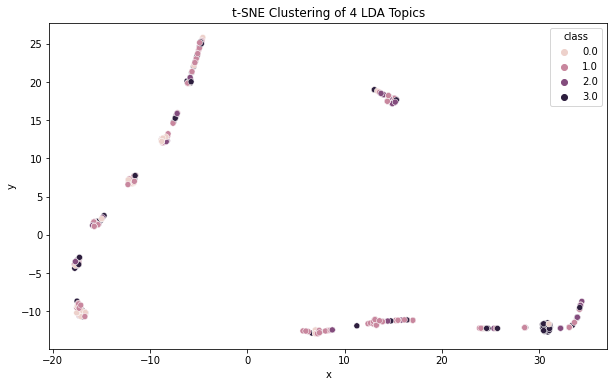

In [324]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

arr=df_dominant_topic['Topic_Perc_Contrib']


#Dominant topic number in each doc

topic_num = df_dominant_topic['Dominant_Topic']
#tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99)
tsne_lda = tsne_model.fit_transform(np.array(arr).reshape(-1,1))
#print(tsne_lda)
df=pd.DataFrame()
df['x']=tsne_lda[:,0]
df['y']=tsne_lda[:,1]
df['class']=topic_num
plt.figure(figsize=(10,6))
plt.title("t-SNE Clustering of {} LDA Topics".format(n_topics))
sns.scatterplot(data=df, x="x", y="y", hue="class",sizes=(20, 200), legend="full")

###**Word Cloud**

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

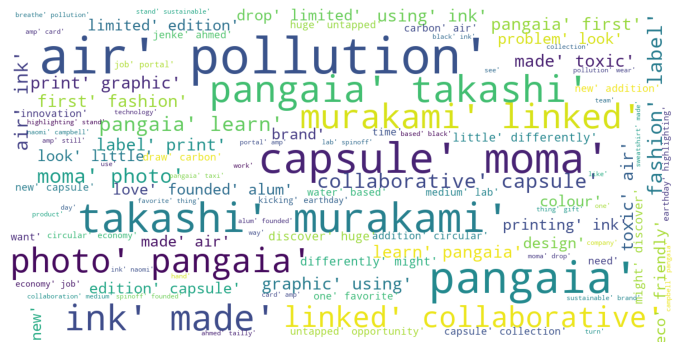

In [325]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
   """
   Function to generate word cloud 
   """
   wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
   wordcloud=wordcloud.generate(str(data))
   fig = plt.figure(1, figsize=(12, 12))
   plt.axis('off')
   plt.imshow(wordcloud)
   plt.show()

  
show_wordcloud(corpus)

### **Named entity recognition**

Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc

In [326]:
import spacy

nlp = spacy.load("en_core_web_sm")
def ner(text):
  """
  Saving name entity 
  """
  doc=nlp(text)
  return [X.label_ for X in doc.ents]
#runing name entity model on twitter data set
ent=frame['TweetText'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

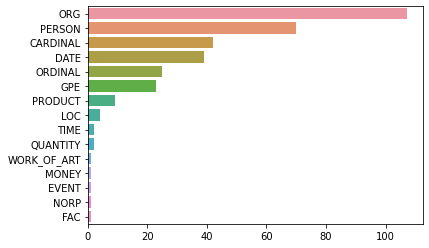

In [327]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

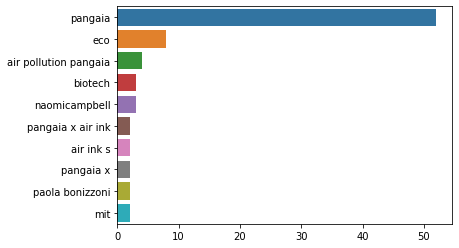

In [328]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=frame['TweetText'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

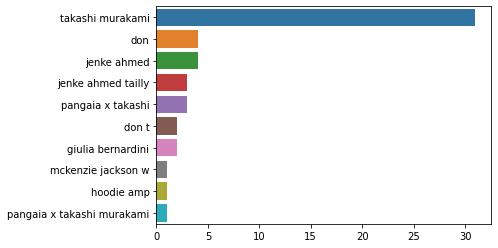

In [329]:
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=frame['TweetText'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

# **Part of Speech Tagging**

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

Noun (NN)- Joseph, London, table, cat, teacher, pen, city

Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is

Adjective(JJ)- beautiful, happy, sad, young, fun, three

Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow

Preposition (IN)- at, on, in, from, with, near, between, about, under

Conjunction (CC)- and, or, but, because, so, yet, unless, since, if

Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this

Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


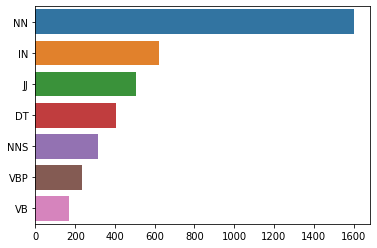

In [330]:
import nltk
nltk.download('averaged_perceptron_tagger')
def pos(text):
    """Part of speech Tagging"""
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=frame['TweetText'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## **Noun Phrase Detection**

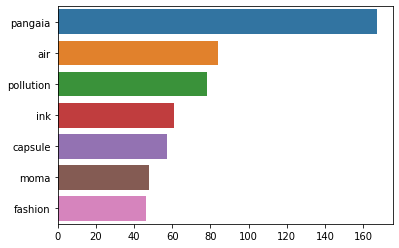

In [331]:
#Using NLTK
def get_adjs(text):
      adj=[]
      pos=nltk.pos_tag(nltk.word_tokenize(text))
      for word,tag in pos:
        if tag=='NN':
            adj.append(word)
      return adj
    


words=frame['TweetText'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## **Noun Phrase Extraction**

In [332]:
nltk.download('brown')
def getNounPhraseFromText(text):
   """
   input tweet output extracted noun phrase from each tweet text
   """
   blob = TextBlob(text)
   return blob.noun_phrases
nounphrase = []
for i in frame['TweetText']:
  print(getNounPhraseFromText(i))
  nounphrase.append(getNounPhraseFromText(i))
        


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
['friendly brand unveils', 'new capsule collection', 'hoodies t']
['new initiative', 'air pollution']
['new initiative', 'air pollution']
['friendly brand unveils', 'new capsule collection', 'hoodies t']
['friendly brand unveils', 'new capsule collection', 'hoodies t']
['friendly brand unveils', 'new capsule collection']
['blue pangaia tracksuit', 'size xs pls dm', 'details pangaia kuwait resell forsale sale sweatpants']
[]
['new air ink capsule', 'hoodies t shirts', 'track pants', 'innovative description']
['life elijah mckenzie jackson w']
['i ve', 'pangaia colourful', 'sustainable ethical loungewear']
['pangaia taxis tweet', 'hashtag pa']
['pangaia taxis tweet']
['time air ink', 'black ink']
['edition capsule']
['don t breathe pollution', 'black ink', 'air pollution conceptualiz']
['pangaia hoodie amp']
['pangaia needs', 'pandemic uniform', 's examines']
['set i']
['destination oxf

## **Sentiment Modeling**

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

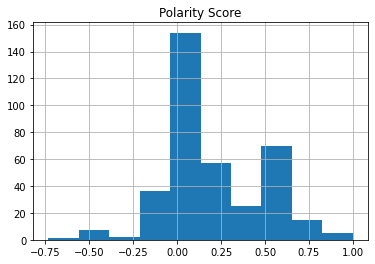

In [333]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
def sentiment_textblob(x):
        
        if x<0:
            return 'negative'
        elif x==0:
            return 'neutral'
        else:
            return 'positive'
frame['polarity_score']=[polarity(i) for i in frame['TweetText']]
frame['Sentiments'] = [sentiment_textblob(i) for i in frame['polarity_score']]
plt.title('Polarity Score')
frame['polarity_score'].hist()

In [334]:
frame['Sentiments'].value_counts()

positive    192
neutral     133
negative     47
Name: Sentiments, dtype: int64

In [335]:
frame[frame['Sentiments']=='pos']['TweetText']

Series([], Name: TweetText, dtype: object)

we can analyze that the polarity mainly ranges between -0.75 to 1. majority of data lies between 0.00 to o.50 this mean majority tweets are positve.

In [336]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    plt.title('Sentiment Graph')
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

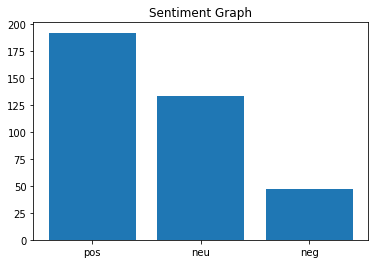

In [337]:
plot_sentiment_barchart(frame['TweetText'], method='TextBlob')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


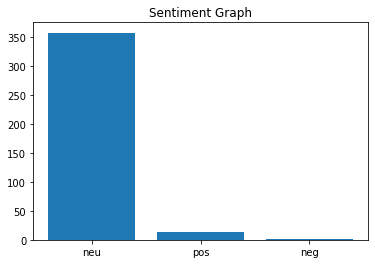

In [338]:
plot_sentiment_barchart(frame['TweetText'], method='Vader')